# Quasi-Analytical Least-Squares Generative Adversarial Networks: Further 1-D Results and Extension to Two Data Dimensions,

## Requirements

Use `requirements.txt` file preferably in virtual environment.

In order to do that in the current folder, for Ubuntu:
```
$ sudo apt install virtualenv
$ virtualenv venv
$ source venv/bin/activate
(venv)$ pip install -r requirements.txt
(venv)$ python -m ipykernel install --user --name=venv
```

Launch from command prompt: 
```bash
(venv)$ jupyter notebook
```

or open it within VSCode with [Jupyter extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter) or any other favorite method. Please make sure that the Jupyter kernel points to your environment (select it from the kernel menu).

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

from scipy.io import savemat 
from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('..')

In [4]:
from gan.utils import load_analytical
from gan.optimal_discriminator.sgd import SGD_gh
from gan.optimal_discriminator.gan import sample_xz


## Cost function computed using sampling
$$
V[G,D] = {1 \over m} \sum_{i = 1}^m
D^2(x_i) + [1 - D(G(z_i))]^2
$$

## SGD procedure

In [5]:
def run_SGD(config_gan, config_sgd, x, z):
  a, b, c, _, _ = [v[1] for v in config_sgd.items()]
  g_initial, h_initial, eps_b, eps_h, n_steps = [v[1] for v in config_gan.items()]
  gd = SGD_gh(x, z, a, b, c, g_initial, h_initial, eps_b, eps_h, n_steps)
  path = [val for val in gd]
  g_path = [g_initial]
  h_path = [h_initial]
  g_path += [val[0] for val in path]
  h_path += [val[1] for val in path]
  return g_path, h_path

In [6]:
def run_SGD_batch(config_gan, config_sgd, n_runs=25, n_samples=10_000):
  g_paths = []
  h_paths = []
  for _ in tqdm(range(n_runs)):
    x, z = sample_xz(config_gan, n_samples=n_samples)
    g_hat, h_hat = run_SGD(config_sgd, config_gan, x, z)
    g_paths += [g_hat]
    h_paths += [h_hat]
  return g_paths, h_paths

## Plot utility

In [7]:
def plot_comparison_and_save_mat(config_gan, config_sgd, g_paths, h_paths, fname_analytical=None):
    fig, _ = plt.subplots()
    plt.grid(True)

    if fname_analytical is not None:
        analytical = load_analytical(fname_analytical, 'Theta')
        plt.plot(analytical, label=[f'analytical $g_0$ = {config_sgd["g_initial"]}',
                                    f'analytical $h_0$ = {config_sgd["h_initial"]}'])
    plt.plot(np.array(g_paths).transpose(), color='lightblue')
    plt.plot([], [], label='$g$ MC', color='lightblue')
    plt.plot(np.array(h_paths).transpose(), color='peachpuff')
    plt.plot([], [], label='$h$ MC', color='peachpuff')
    n_steps = config_sgd['n_steps'] - 1
    plt.plot(n_steps, 1.0/config_gan["c"], marker='o', linestyle='None',
             label='optimal $g^*$', color='lightblue', markeredgecolor='black')
    plt.plot(n_steps, 0, marker='o', linestyle='None',
             label='optimal $h^*$', color='orange', markeredgecolor='black')
    plt.legend()
    ofname = f'python_gh_test_case_c_{config_gan["c"]}_g_{config_sgd["g_initial"]}_h{config_sgd["h_initial"]}'
    fig.savefig(os.path.join('content', ofname + '.pdf'), format='pdf')
    savemat(os.path.join('content', ofname + '.mat'), {'g_paths': g_paths, 'h_paths': h_paths})
    plt.show()

## Test case implementation

### MC SGD experiment 1

In [8]:
config_gan = {
    "a": None,
    "b": None,
    "c": 2.1,
    "g": None,
    "h": None,
}
config_sgd = {
    "g_initial": 0.9,
    "h_initial": -1.5,
    "eps_g": 0.4,
    "eps_h": 0.4,
    "n_steps": 100
}

In [9]:
g_paths, h_paths = run_SGD_batch(config_gan=config_gan, config_sgd=config_sgd)

  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [04:55<00:00, 11.81s/it]


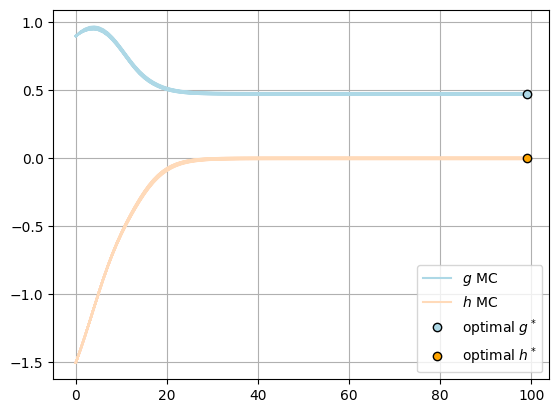

In [10]:
plot_comparison_and_save_mat(config_gan=config_gan,
                             config_sgd=config_sgd,
                             g_paths=g_paths, 
                             h_paths=h_paths)

### MC SGD experiment 2

In [11]:
config_gan = {
    "a": None,
    "b": None,
    "c": 1.2,
    "g": None,
    "h": None,
}
config_sgd = {
    "g_initial": 1.5,
    "h_initial": -2.0,
    "eps_g": 0.4,
    "eps_h": 0.4,
    "n_steps": 100
}

In [12]:
g_paths, h_paths = run_SGD_batch(config_gan=config_gan, config_sgd=config_sgd)

  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [04:48<00:00, 11.53s/it]


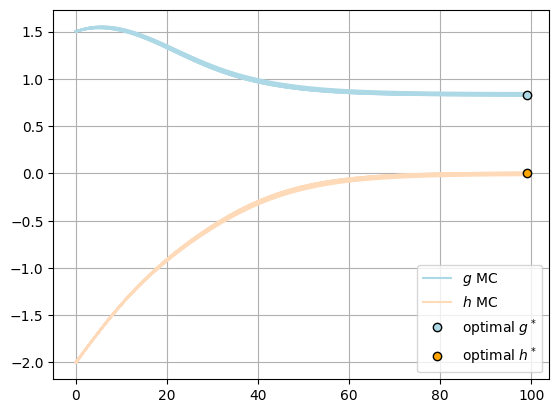

In [13]:
plot_comparison_and_save_mat(config_gan=config_gan,
                             config_sgd=config_sgd,
                             g_paths=g_paths, 
                             h_paths=h_paths)

### MC SGD experiment 3

In [14]:
config_gan = {
    "a": None,
    "b": None,
    "c": 1.2,
    "g": None,
    "h": None,
}
config_sgd = {
    "g_initial": 1.9,
    "h_initial": -3.0,
    "eps_g": 0.4,
    "eps_h": 0.4,
    "n_steps": 100
}

In [15]:
g_paths, h_paths = run_SGD_batch(config_gan=config_gan, config_sgd=config_sgd)

100%|██████████| 25/25 [04:31<00:00, 10.85s/it]


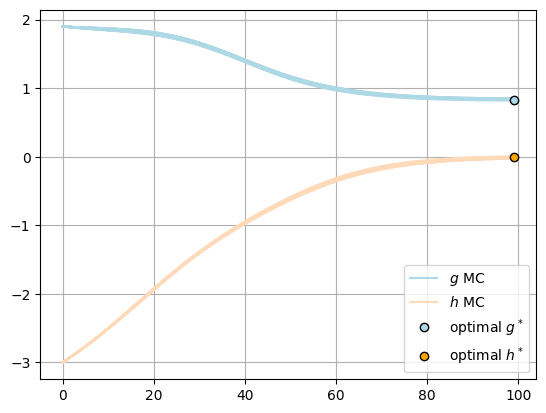

In [16]:
plot_comparison_and_save_mat(config_gan=config_gan,
                             config_sgd=config_sgd,
                             g_paths=g_paths, 
                             h_paths=h_paths)

### MC SGD experiment 4

In [17]:
config_gan = {
    "a": None,
    "b": None,
    "c": 1.2,
    "g": None,
    "h": None,
}
config_sgd = {
    "g_initial": 1.9,
    "h_initial": -2.9,
    "eps_g": 0.4,
    "eps_h": 0.4,
    "n_steps": 100
}

In [18]:
g_paths, h_paths = run_SGD_batch(config_gan=config_gan, config_sgd=config_sgd)

100%|██████████| 25/25 [04:40<00:00, 11.23s/it]


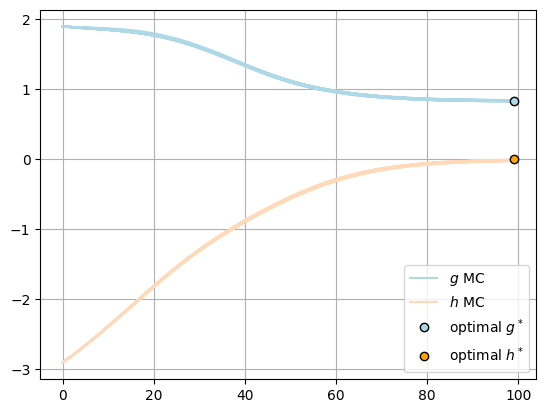

In [19]:
plot_comparison_and_save_mat(config_gan=config_gan,
                             config_sgd=config_sgd,
                             g_paths=g_paths, 
                             h_paths=h_paths)

## MC Experiment 5

In [20]:
config_gan = {
    "a": None,
    "b": None,
    "c": 2.1,
    "g": None,
    "h": None,
}
config_sgd = {
    "g_initial": 0.9,
    "h_initial": -1.5,
    "eps_g": 0.4,
    "eps_h": 0.4,
    "n_steps": 100
}

In [21]:
g_paths, h_paths = run_SGD_batch(config_gan=config_gan, config_sgd=config_sgd)

100%|██████████| 25/25 [04:14<00:00, 10.16s/it]


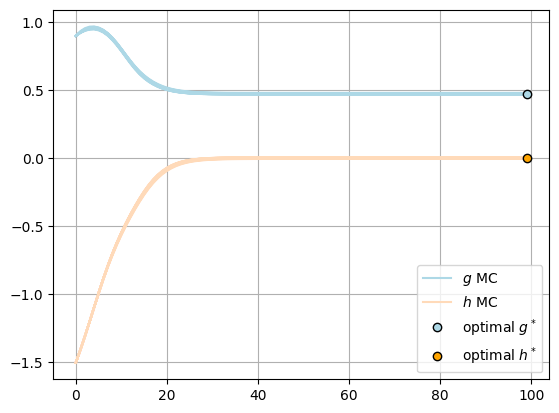

In [22]:
plot_comparison_and_save_mat(config_gan=config_gan,
                             config_sgd=config_sgd,
                             g_paths=g_paths, 
                             h_paths=h_paths)